## Problem Statement

### • DOMAIN: Industrial safety. NLP based Chatbot.

### • CONTEXT:

- The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.
### • DATA DESCRIPTION:
- This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.
- Columns description:
    - ‣ Data: timestamp or time/date information
    - ‣ Countries: which country the accident occurred (anonymised)
    - ‣ Local: the city where the manufacturing plant is located (anonymised)
    - ‣ Industry sector: which sector the plant belongs to
    - ‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
    - ‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
    - ‣ Genre: if the person is male of female
    - ‣ Employee or Third Party: if the injured person is an employee or a third party
    - ‣ Critical Risk: some description of the risk involved in the accident
    - ‣ Description: Detailed description of how the accident happened.

### • PROJECT OBJECTIVE:

- Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description.

#### • PROJECT TASK: [ Score: 100 points]

##### 1. Milestone 1: [ Score: 40 points ]
##### ‣ Input: Context and Dataset
##### ‣ Process:
- ‣ Step 1: Import the data [ 3 points ]
- ‣ Step 2: Data cleansing [ 5 points ]
- ‣ Step 3: Data preprocessing (NLP Preprocessing techniques) [ 7 points ]
- ‣ Step 4: Data preparation - Cleansed data in .xlsx or .csv file [ 5 points ]
- ‣ Step 5: Design train and test basic machine learning classifiers [ 10 Points ]
- ‣ Step 6: Interim report [ 10 points ]
- ‣ Submission: Interim report, Jupyter Notebook with all the steps in Milestone-1

### Importing the necessary libraries

In [1]:
# installing libraries to use word embeddings
!pip install gensim -q

In [2]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# To encode the target variable
from sklearn.preprocessing import LabelEncoder

# To import Word2Vec
from gensim.models import Word2Vec

# To tune the model
from sklearn.model_selection import GridSearchCV

# Converting the Stanford GloVe model vector format to word2vec
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# To split data into train and test sets
from sklearn.model_selection import train_test_split

# To build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# To compute metrics to evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prakuma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prakuma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# loading the dataset
given_sheet = 'Data Set - industrial_safety_an'
file_name = 'Industrial_safety_and_health_database_with_accidents_description.xlsx' 
df = pd.read_excel(file_name, sheet_name=given_sheet)

In [4]:
# creating a copy of the dataset
data = df.copy()

In [5]:
# Print first 5 rows of data
data.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter."
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury."
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury."
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described."


### dropping the rownum from data as it won't be adding any value in analysis 

In [6]:
data = data.drop('Unnamed: 0', axis=1)

In [7]:
# Print random 5 rows of data
data.sample(5)

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
184,2016-08-02,Country_03,Local_10,Others,I,I,Male,Third Party,Bees,"The mincing team was carrying out activities in the city of Juína and was coordinated by mining technician Felipe a time when the mining technician was last in line and more away from the team, was bitten by a blackjack on the left side of his face. There was no allergic manifestation and the team continued the work. In the afternoon, after lunch, the employee sought medical care, was medicated and released to continue activities the next day."
405,2017-06-11,Country_01,Local_06,Metals,I,II,Male,Third Party,Cut,"Approx. 18:40 hours, Mr. Luis maintenance team of mobile equipment, adjusted a bolt of the front loader J005A, at which time his face is impacted by the key used for this activity, producing a slight cut in the surface of the face. He is transferred to the medical service, attended and registered."
143,2016-06-08,Country_03,Local_10,Others,I,I,Male,Third Party,Bees,"Project of Vazante that carried out sediment collection of current in the South of Mata target, in the drainage of Serra do Garrote. team that was composed of 04 members of the WCA company, being the S.r.s Leandro, and Jehovânio. they were moving from one collection point to another, inside a shallow drainage, they saw the bee carton, the reaction was to move away from the box as quickly as possible to avoid the stings, they ran about 50 meters, looking for a safe area, to exit the radius of attack of the bees, but the S.S. and Breno), were attacked and consequently they suffered 02 stings, in the belly and Jehovah in the hand, verified that there was no type of allergic reaction, returned with the normal activities."
337,2017-02-25,Country_01,Local_01,Mining,I,III,Male,Employee,Projection,"In the support process, in circumstances that the assistant performs the Last cut in the transverse length of the mesh; The mesh generates a movement towards the operator and hits the face causing the described injury."
183,2016-08-01,Country_02,Local_05,Metals,II,III,Female,Third Party,Manual Tools,The employee of partner company GR reports that she was cutting watermelon when she injured her 2nd chirodactilo of the left hand with the knife.


In [8]:
# checking an incident Description text
data.loc[3, 'Description']

'Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the "DADO" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.'

### Checking the shape of the dataset

In [9]:
# print shape of data
data.shape

(425, 10)

### Checking for missing values

In [10]:
# Check for missing values
data.isnull().sum()

Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

- There are no mising values in the data

### Checking for duplicate values

In [11]:
# Check for duplicate values
data.duplicated().sum()

7

- Found 7 duplicate rows, will drop of duplicate rows

In [12]:
data = data.drop_duplicates()

# resetting the dataframe index
data.reset_index(drop=True, inplace=True)

In [13]:
# Check for duplicate values again
data.duplicated().sum()

0

### Checking the statistical summary

In [14]:
data.describe(datetime_is_numeric=False)

C:\Users\prakuma\AppData\Local\Temp\ipykernel_1184\1109636964.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(datetime_is_numeric=False)


,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
count,418,418,418,418,418,418,418,418,418,418
unique,287,3,12,3,5,6,2,3,33,411
top,2017-02-08 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,"During the activity of chuteo of ore in hopper OP5; the operator of the locomotive parks his equipment under the hopper to fill the first car, it is at this moment that when it was blowing out to release the load, a mud flow suddenly appears with the presence of rock fragments; the personnel that was in the direction of the flow was covered with mud."
freq,6,248,89,237,309,141,396,185,229,2
first,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-07-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
dataWithoutDate = data.drop('Data', axis=1)
dataWithoutDate.describe()

,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
count,418,418,418,418,418,418,418,418,418
unique,3,12,3,5,6,2,3,33,411
top,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,"During the activity of chuteo of ore in hopper OP5; the operator of the locomotive parks his equipment under the hopper to fill the first car, it is at this moment that when it was blowing out to release the load, a mud flow suddenly appears with the presence of rock fragments; the personnel that was in the direction of the flow was covered with mud."
freq,248,89,237,309,141,396,185,229,2


- There seem to a large number of incidents from the Mining Industry Sector

## Exploratory Data Analysis (EDA)

In [16]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=12)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

#### Distribution of incident's `Industry Sector`

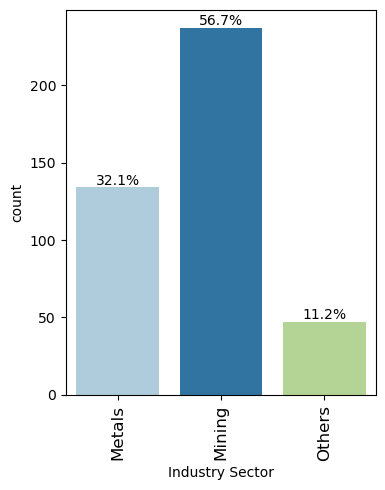

In [17]:
labeled_barplot(data, "Industry Sector", perc=True)

- Majority of the incidents in the data are from 
    - `Mining Industry Sector (56.7%)`, 
    - followed by `Metals Industry Sector (32.1%)` and 
    - rest of are contributed from `Others Industry Sector (11.2%)` 

#### Distribution of incident's `Accident Level`

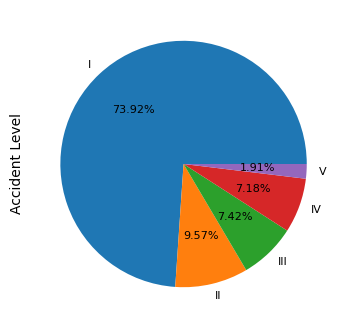

In [18]:
#labeled_barplot(data, "Accident Level", perc=True)
# Visualize a Pie-chart and print percentage
data['Accident Level'].value_counts().plot(kind='pie',figsize=(6, 4),autopct='%1.2f%%', fontsize=8)
plt.show()

- Most of incidents are from `Accident Level - I (73.9%)` i.e these are least severe incidents.
- Most Severe incidents of `Accident Level - V (1.9%)`
- No data for `Accident Level - VI`

#### Distribution of incident's Potential Accident Level

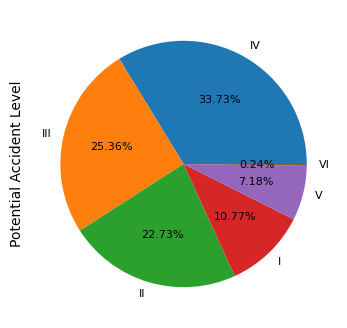

In [19]:
data['Potential Accident Level'].value_counts().plot(kind='pie',figsize=(6, 4),autopct='%1.2f%%', fontsize=8)
plt.show()

- Potential Accident Level distribution observations

#### Distribution of incident's `Critical Risk`

In [20]:
data['Critical Risk'].value_counts()

Others                                       229
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Cut                                           14
Venomous Animals                              13
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Fall prevention (same level)                   7
remains of choco                               7
Pressurized Systems                            7
Fall prevention                                6
Suspended Loads                                6
Blocking and isolation of energies             3
Pressurized Systems / Chemical Substances      3
Power lock                                     3
Liquid Metal                                   3
Machine Protection                             2
Electrical Shock    

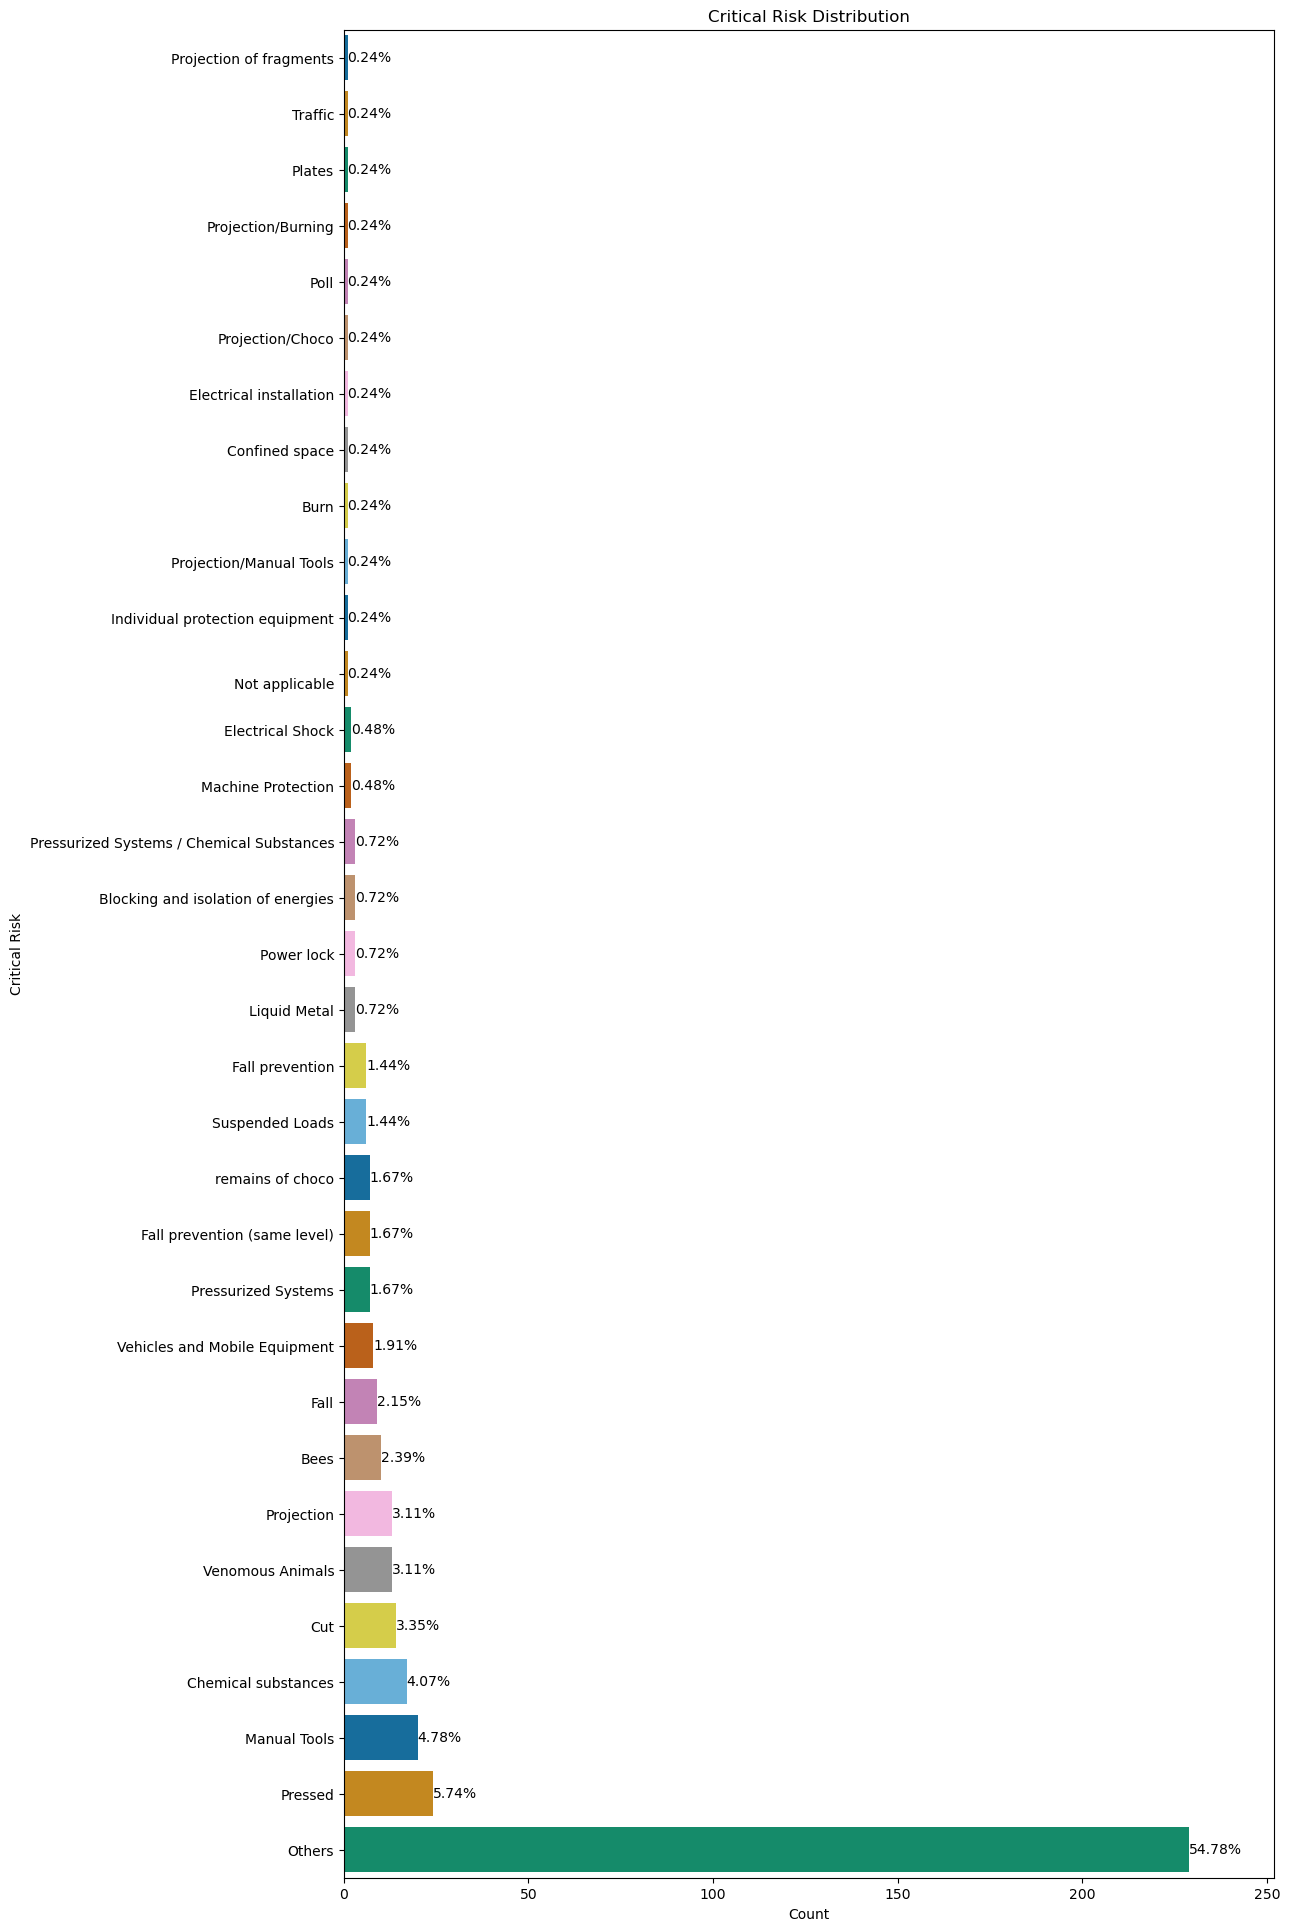

In [21]:
# Visualize ordered countPlot in transposed way since 33 values
plt.figure(figsize=(12, 24))

ax = sns.countplot(y=data['Critical Risk'], palette='colorblind', order=data['Critical Risk'].value_counts(ascending=True).index)

# get the total count of the type column
total = data['Critical Risk'].count()

# annotate the bars with fmt from matplotlib v3.7.0
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.2f}%')

# add space at the end of the bar for the labels
ax.margins(x=0.1)

ax.set(xlabel='Count', ylabel='Critical Risk', title='Critical Risk Distribution')
plt.show()

- `Critical Risk` distribution observations

#### Distribution of incident's Genre

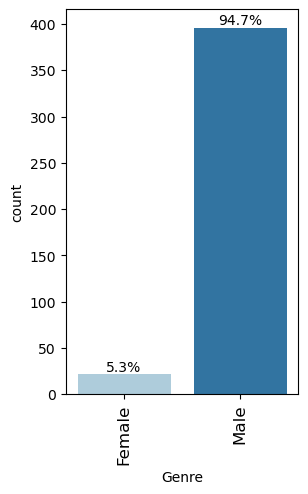

In [22]:
labeled_barplot(data, "Genre", perc=True)

- Genere distribution observations

#### Distribution of incident's `Employee or Third Party`

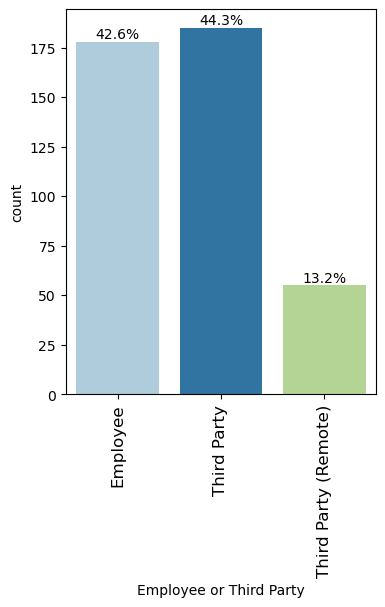

In [23]:
labeled_barplot(data, "Employee or Third Party", perc=True)

- `Employee or Third Party` distribution observations

#### Distribution of incident's `Countries`

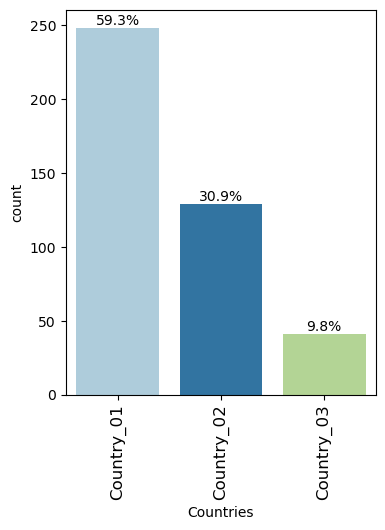

In [24]:
labeled_barplot(data, "Countries", perc=True)

- `Countries` distribution observations

#### Distribution of incident's `Local`

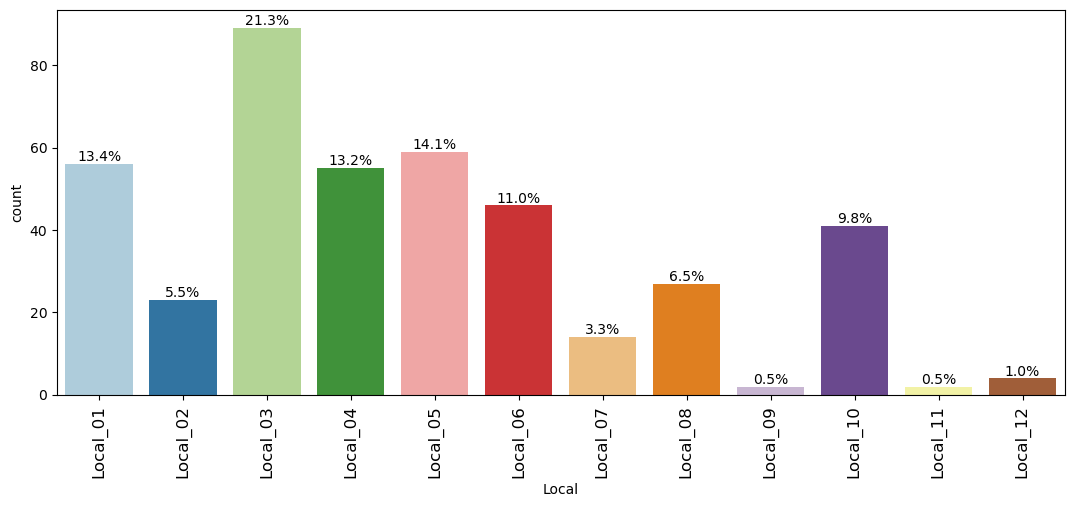

In [25]:
labeled_barplot(data, "Local", perc=True)

- `Local` distribution observations

#### Distribution of incident's `Data`

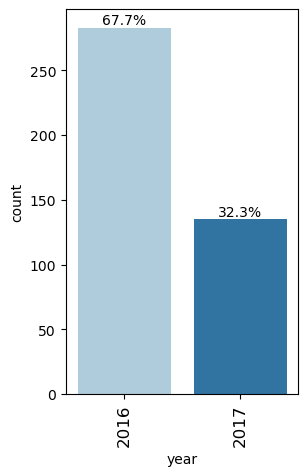

In [26]:
data['year'] = pd.to_datetime(data['Data']).dt.year
labeled_barplot(data, "year", perc=True)

- `Data` distribution observations

### BiVariate Analysis using stacked Charts for categorical columns

<Axes: xlabel='Local'>

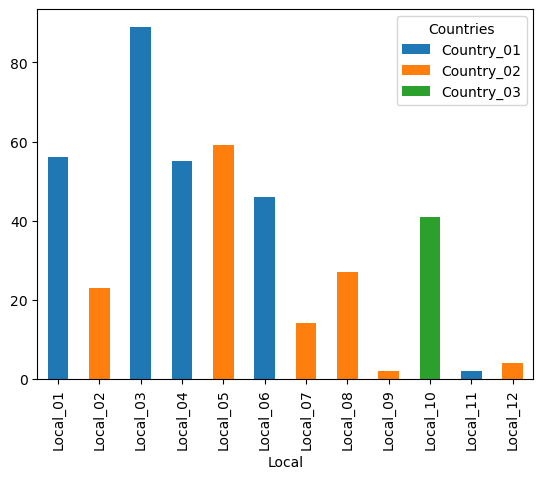

In [27]:
pd.crosstab(data['Local'], data['Countries']).plot.bar(stacked=True)

##### Observations
- Local_01, Local_03, Local_04, Local_06 and Local_11 situated in Country_01
- Local_02, Local_05, Local_07, Local_08, Local_09 and Local_12 situated in Country_02
- Only single location - Local_10 situated in Country_03
- Local_03 have highest incidents around 90.
    

<Axes: xlabel='Accident Level'>

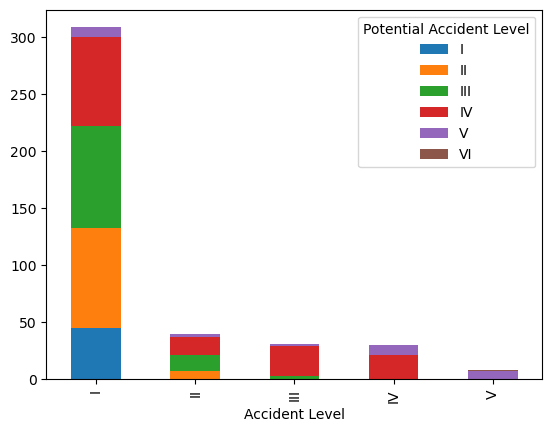

In [28]:
pd.crosstab(data['Accident Level'], data['Potential Accident Level']).plot.bar(stacked=True)

#### Observations
- Only 40 `Type-I Accident Level` also have `Type-I Potential Accident Level` i.e No change in actual and potential.
- About 260+ `Type-I Accident Level` have increased `Potential Accident Level of II to V`


In [29]:
pd.crosstab(data['Critical Risk'], data['Accident Level'])

Accident Level,I,II,III,IV,V
Critical Risk,,,,,
\nNot applicable,0,0,0,1,0
Bees,10,0,0,0,0
Blocking and isolation of energies,3,0,0,0,0
Burn,0,0,1,0,0
Chemical substances,15,2,0,0,0
Confined space,1,0,0,0,0
Cut,11,2,1,0,0
Electrical Shock,2,0,0,0,0
Electrical installation,0,0,0,1,0


<Axes: xlabel='Critical Risk'>

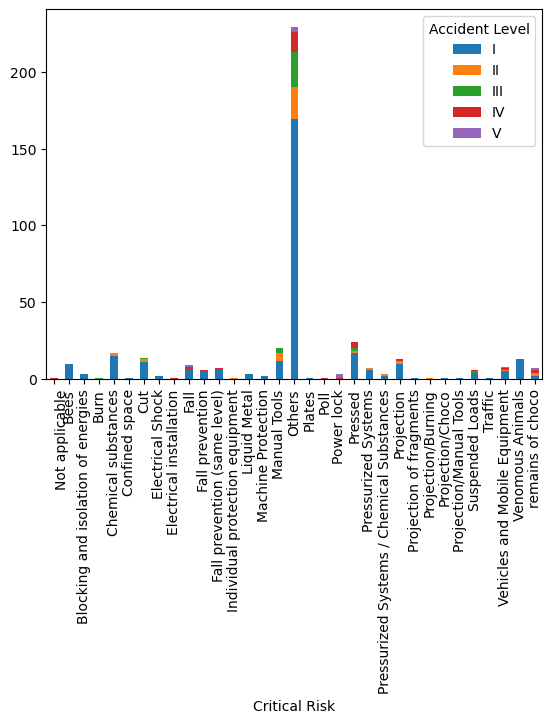

In [30]:
pd.crosstab(data['Critical Risk'], data['Accident Level']).plot.bar(stacked=True)

#### Observations

In [31]:
pd.crosstab(data['Accident Level'], data['Employee or Third Party'])

Employee or Third Party,Employee,Third Party,Third Party (Remote)
Accident Level,,,
I,139,130,40
II,15,19,6
III,14,14,3
IV,10,16,4
V,0,6,2


<Axes: xlabel='Accident Level'>

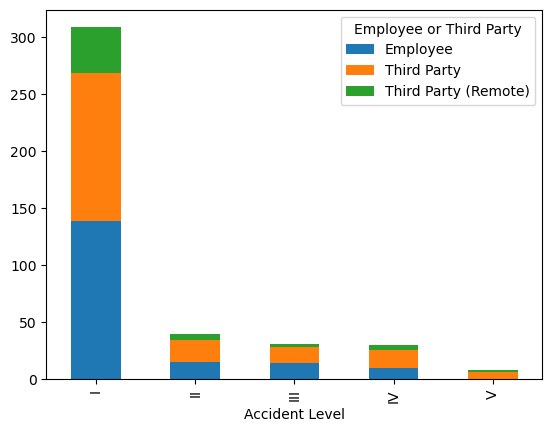

In [32]:
pd.crosstab(data['Accident Level'], data['Employee or Third Party']).plot.bar(stacked=True)

In [33]:
pd.crosstab(data['Genre'], data['Accident Level'])

Accident Level,I,II,III,IV,V
Genre,,,,,
Female,18,3,1,0,0
Male,291,37,30,30,8


<Axes: xlabel='Genre'>

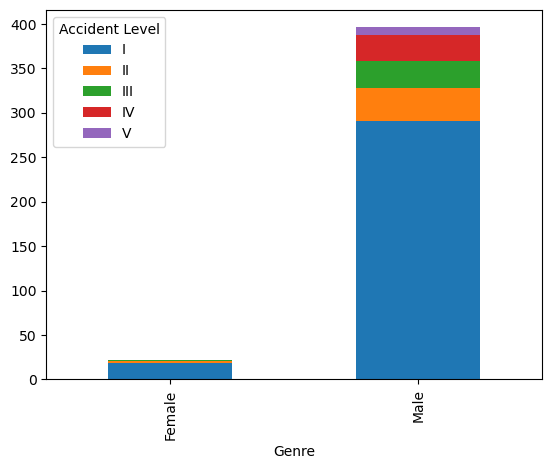

In [34]:
pd.crosstab(data['Genre'], data['Accident Level']).plot.bar(stacked=True)

#### Observations